In [1]:
from small_ga.functions import functions
from tqdm.auto import tqdm
from utils.setup_helper import setup
setup(globals())

In [14]:
root = os.path.join('zz_meta', 'results')
func_roots = os.listdir(root)

In [19]:
func_results = dict()
for func in functions:
    func_folders = [f for f in func_roots if func.name in f]
    attack = [f for f in func_folders if 'attack' in f][0]
    help = [f for f in func_folders if 'help' in f][0]
    n_bits = int(attack.split('_')[-2])
    attack = os.path.join(root, attack)
    help = os.path.join(root, help)
    func_results[func.name] = (n_bits, attack, help)    

In [42]:
func_results

{'De Jong 1': (23,
  'zz_meta\\results\\De Jong 1_attack_23_bits',
  'zz_meta\\results\\De Jong 1_help_23_bits'),
 'Sum of different power 9': (20,
  'zz_meta\\results\\Sum of different power 9_attack_20_bits',
  'zz_meta\\results\\Sum of different power 9_help_20_bits'),
 "Ackley's Path 10": (20,
  "zz_meta\\results\\Ackley's Path 10_attack_20_bits",
  "zz_meta\\results\\Ackley's Path 10_help_20_bits")}

In [51]:
def load_scores(meta_ga_root):
    all_scores = []
    for i in range(300):
        all_scores.append(np.load(os.path.join(meta_ga_root, str(i), 'scores.npy')))
    return np.array(all_scores)

In [52]:
results = []
for func in func_results.keys():
    r = func_results[func]
    bits = r[0]
    attack_scores = load_scores(r[1])
    help_scores = load_scores(r[2])
    results.append((func, bits, attack_scores, help_scores))
    
# instead of clipping
results[1][3][108] = results[1][3][105]

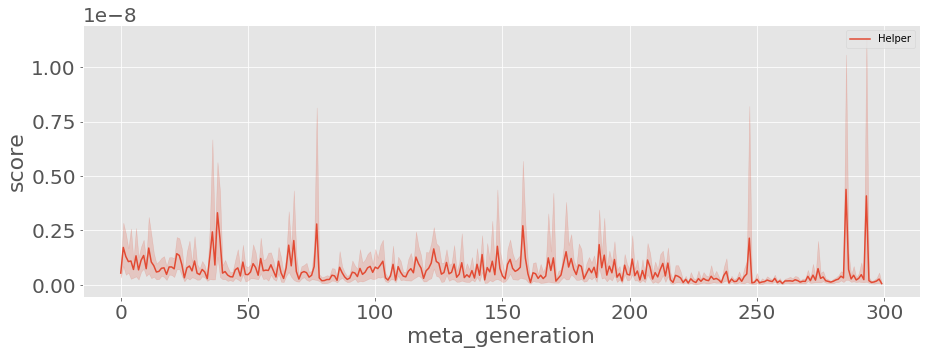

In [91]:
_df = pd.DataFrame(results[1][3]).T.melt()
_df.columns = ['meta_generation', 'score']
_ = sns.lineplot(data=_df, x='meta_generation', y='score', label='Helper')

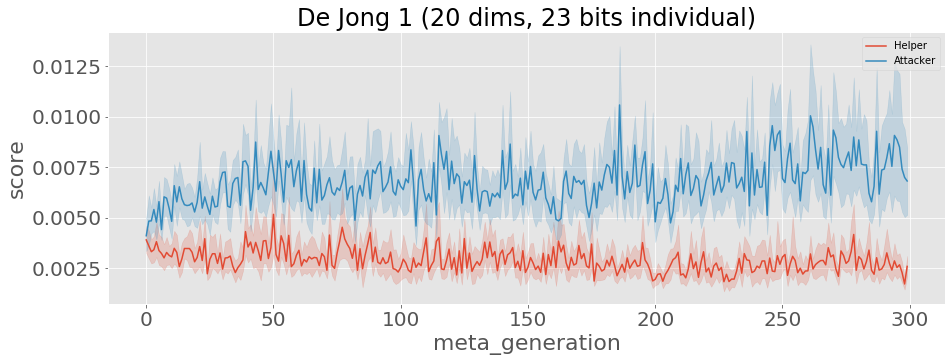

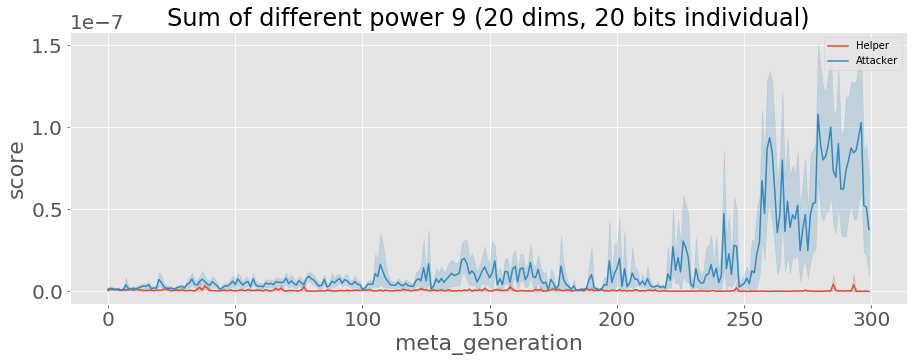

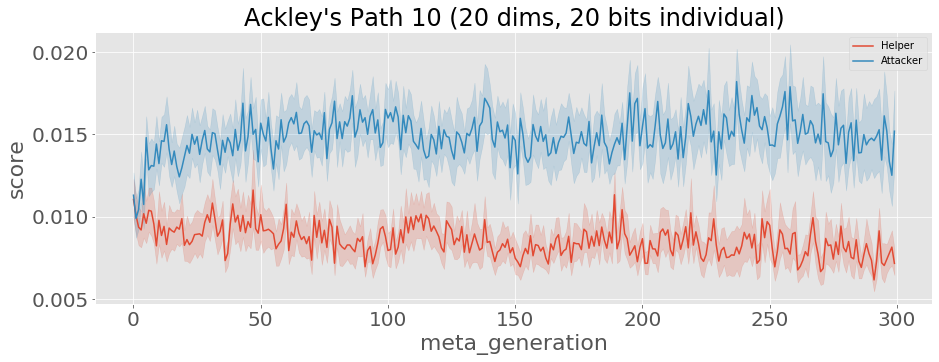

In [96]:
for result in results:
    function_name = result[0]
    bits = result[1]
    attack_scores = result[2]
    help_scores = result[3]
    
    _df = pd.DataFrame(help_scores).T.melt()
    _df.columns = ['meta_generation', 'score']
    _ = sns.lineplot(data=_df, x='meta_generation', y='score', label='Helper')

    _df = pd.DataFrame(-attack_scores).T.melt()
    _df.columns = ['meta_generation', 'score']
    _ = sns.lineplot(data=_df, x='meta_generation', y='score', label='Attacker')

    _ = plt.title(f'{function_name} (20 dims, {bits} bits individual)')
    _ = plt.legend()
#     plt.savefig(f'result_plots/{title}.png', format='PNG')
    plt.show()